In [65]:
%reset
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import esn_module
import importlib
importlib.reload(esn_module)
esn = esn_module.esn

from echo_state_tests import gen_in_out_one_in_subs

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [172]:
ESN = esn(N=200,bias=np.random.normal(0.,0.01,(200)))
#ESN.w_out *= 0.1
ESN.gain *= 0.1

In [173]:
in_xor, out_xor = gen_in_out_one_in_subs(50000,5)
in_xor_test, out_xor_test = gen_in_out_one_in_subs(5000,5)

In [179]:
ESN.eps_LMS_gain=0.005
ESN.eps_LMS_out=0.0

for k in range(1):
    
    gain,w_out = ESN.learn_w_out_gains_online_LMS(in_xor,out_xor,return_gain=True,
                                              return_w_out=True,subsample_rec=10,t_prerun=1000)
    
    ESN.learn_w_out(in_xor[:10000],out_xor[:10000])
#ESN.learn_w_out(in_xor,out_xor)

100%|██████████| 9999/9999 [00:00<00:00, 15848.18it/s]


In [180]:
out_xor_pred = ESN.predict_data(in_xor_test)

100%|██████████| 4999/4999 [00:00<00:00, 15139.46it/s]


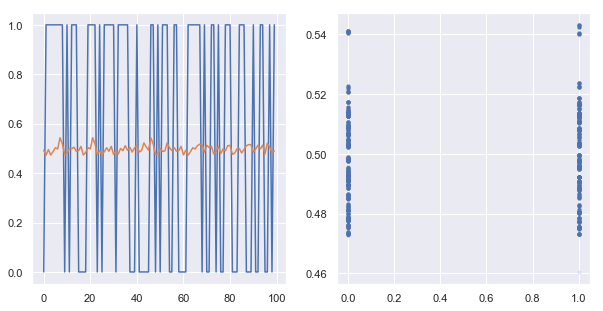

In [181]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(out_xor_test[-100:])
ax[0].plot(out_xor_pred[-100:])

ax[1].plot(out_xor_test,out_xor_pred,'.',alpha=0.1)
plt.show()

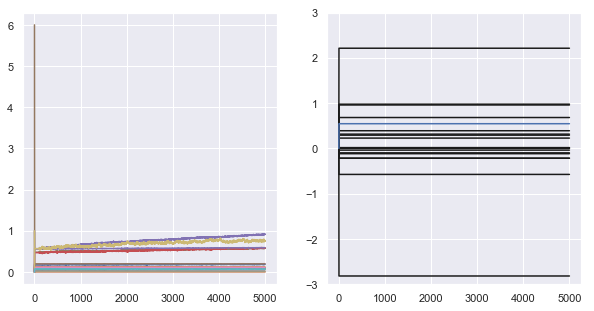

In [182]:
fig2, ax2 = plt.subplots(1,2,figsize=(10,5))

ax2[0].plot(gain[:,:20])

ax2[1].plot(w_out[:,0,1:20],c='k')
ax2[1].plot(w_out[:,0,0])

ax2[1].set_ylim([-3.,3.])

plt.show()

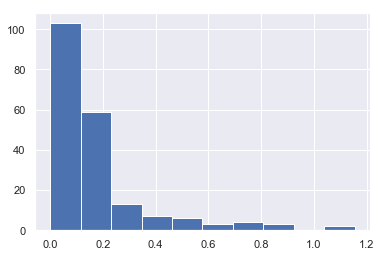

In [183]:
plt.hist(ESN.gain)
plt.show()